In [111]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")
# sns.set(style="whitegrid", palette=sns.color_palette("RdBu", n_colors=2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob



In [124]:
def m_to_cm(x):
    return x * 100
def unit(x):
    return x
def scale_to_rads(x):
    return 20 * x

fsm_map = [
    {'name': 'Wheel Base'        , 'default': 0.08, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Track Width'       , 'default': 0.12, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Wheel Radius'      , 'default': 0.02, 'minval': 0.02, 'maxval': 0.03, 'T': m_to_cm},
    {'name': 'Weg Count'         , 'default': 3   , 'minval': 0   , 'maxval': 7.99, 'T': int  },
    {'name': 'Ext. Slope'        , 'default': 0.5 , 'minval': 0   , 'maxval': 1   , 'T': unit},
    {'name': 'Ext. Intercept'    , 'default': 0.5 , 'minval': 0   , 'maxval': 1   , 'T': unit},
    {'name': 'F. Speed'          , 'default': 1   , 'minval': 0   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'F. Left Thresh'    , 'default': 0.17, 'minval': 0   , 'maxval': pi/2, 'T': np.rad2deg},
    {'name': 'F. Right Thresh'   , 'default':-0.17, 'minval':-pi/2, 'maxval': 0   , 'T': np.rad2deg},
    {'name': 'L. Speed Left'     , 'default':-1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'L. Speed Right'    , 'default': 1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'L. Forward Thresh' , 'default': 0.08, 'minval': 0   , 'maxval': pi/2, 'T': np.rad2deg},
    {'name': 'R. Speed Left'     , 'default': 1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'R. Speed Right'    , 'default':-1   , 'minval':-1   , 'maxval': 1   , 'T': scale_to_rads},
    {'name': 'R. Forward Thresh' , 'default':-0.08, 'minval':-pi/2, 'maxval': 0   , 'T': np.rad2deg},
]
fsm_fancy_names = [
    r'Wheel Base (cm)',r'Track Width (cm)',r'Wheel Radius (cm)',r'Ext. Count',r'Ext. Slope ($\%$)',
    r'Ext. Intercept ($\%$)',r'F. Speed (rad $s^{-1}$)',r'F. Left Thresh ($\deg$)',
    r'F. Right Thresh ($\deg$)',r'L. Speed Left (rad $s^{-1}$)',r'L. Speed Right (rad $s^{-1}$)',
    r'L. Forward Thresh ($\deg$)',r'R. Speed Left (rad $s^{-1}$)',r'R. Speed Right (rad $s^{-1}$)',
    r'R. Forward Thresh ($\deg$)'
]
for m, n in zip(fsm_map, fsm_fancy_names):
    m['fancy_name'] = n


bnn_map = [
    {'name': 'Wheel Base'        , 'default': 0.08, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Track Width'       , 'default': 0.12, 'minval': 0.08, 'maxval': 0.16, 'T': m_to_cm},
    {'name': 'Wheel Radius'      , 'default': 0.02, 'minval': 0.02, 'maxval': 0.03, 'T': m_to_cm},
    {'name': 'Weg Count'         , 'default': 3   , 'minval': 0   , 'maxval': 7.99, 'T': int  },
    {'name': 'Act. Func.'        , 'default': 0   , 'minval': 0   , 'maxval': 2.99, 'T': int  },
]
bnn_map.extend([{
    'name': 'weight{}'.format(i), 
    'default': 0, 
    'minval': -4, 
    'maxval': 4, 
    'T': float} for i in range(12)])
bnn_fancy_names = [r'Wheel Base (cm)',r'Track Width (cm)',r'Wheel Radius (cm)',r'Ext. Count',r'Act. Func.']
bnn_fancy_names += ['Weight {}'.format(widx) for widx in range(12)]
for m, n in zip(bnn_map, bnn_fancy_names):
    m['fancy_name'] = n



def range_transform(x, a, b, c, d):
    return (x - a) * (d - c) / (b - a) + c

In [115]:
fsm_param_files = '../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat'
bnn_param_files = '../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat'


def get_data_from_file(glob_dir, header, param_map):
    data = []
    for pop_filepath in sorted(glob.iglob(glob_dir, recursive=True)):
        data.append(pd.read_csv(pop_filepath, comment='%', header=None, names=header, sep=' '))
        for m in param_map:
            data[-1][m['name']] = data[-1][m['name']].apply(
                lambda x: m['T'](range_transform(x, 0, 10, m['minval'], m['maxval'])))
    return data


cmaes_header = ['iter', 'evals', 'sigma', '0', 'fitness']

fsm_header = cmaes_header + [arg['name'] for arg in fsm_map]
fsm_replicates = get_data_from_file(fsm_param_files, fsm_header, fsm_map)
print('Found', len(fsm_replicates), 'data files in', fsm_param_files)

bnn_header = cmaes_header + [arg['name'] for arg in bnn_map]
bnn_replicates = get_data_from_file(bnn_param_files, bnn_header, bnn_map)
print('Found', len(bnn_replicates), 'data files in', bnn_param_files)

# fsm_replicates[0].describe()
# fsm_replicates[0].head()
bnn_replicates[0].describe()
# bnn_replicates[0].head()

Found 20 data files in ../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat


,iter,evals,sigma,0,fitness,Wheel Base,Track Width,Wheel Radius,Weg Count,Act. Func.,...,weight2,weight3,weight4,weight5,weight6,weight7,weight8,weight9,weight10,weight11
count,1383.000000,1383.000000,1383.000000,1383.0,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,692.000000,8304.000000,0.691086,0.0,-8.373766,8.584305,10.051985,2.536998,2.501808,1.920463,...,-0.734013,-2.798222,-0.396467,3.398075,2.060129,2.904614,-1.174159,1.104507,-0.681929,-1.374746
std,399.382023,4792.584272,0.363684,0.0,0.959160,0.595132,0.686531,0.405032,1.641041,0.352016,...,1.559603,0.138915,1.618382,0.786279,1.970017,0.896418,2.192882,1.371282,2.322190,1.279082
min,1.000000,12.000000,0.257231,0.0,-8.670000,8.000000,8.030233,2.000000,0.000000,0.000000,...,-4.000000,-3.963756,-3.483864,-2.492442,-3.894248,-0.724899,-3.999977,-3.328632,-4.000000,-3.998686
25%,346.500000,4158.000000,0.403391,0.0,-8.640000,8.206783,9.707529,2.068342,1.000000,2.000000,...,-1.999851,-2.840390,-1.549712,3.123677,0.326366,2.307117,-3.301722,0.128950,-3.188247,-2.531174
50%,692.000000,8304.000000,0.585533,0.0,-8.600000,8.476271,9.942583,2.684021,3.000000,2.000000,...,-0.031375,-2.810405,-0.630850,3.666030,2.894076,3.097015,-1.144037,0.818681,-0.394069,-1.150988
75%,1037.500000,12450.000000,0.873835,0.0,-8.516667,8.784291,10.205306,2.957997,4.000000,2.000000,...,0.021134,-2.763083,0.489818,3.917942,3.745017,3.658992,0.597433,2.018803,1.560033,-0.340138
max,1383.000000,16596.000000,2.215614,0.0,-1.822867,13.507119,14.148370,3.000000,7.000000,2.000000,...,3.998660,-1.447531,3.999998,4.000000,3.999999,3.999997,3.319051,4.000000,3.996538,3.210748


In [116]:
fsm_replicates_combined = pd.concat(fsm_replicates).reset_index(drop=True)
bnn_replicates_combined = pd.concat(bnn_replicates).reset_index(drop=True)

In [117]:
df_fsm_best = fsm_replicates_combined.nsmallest(1000, 'fitness').copy()
df_bnn_best = bnn_replicates_combined.nsmallest(1000, 'fitness').copy()

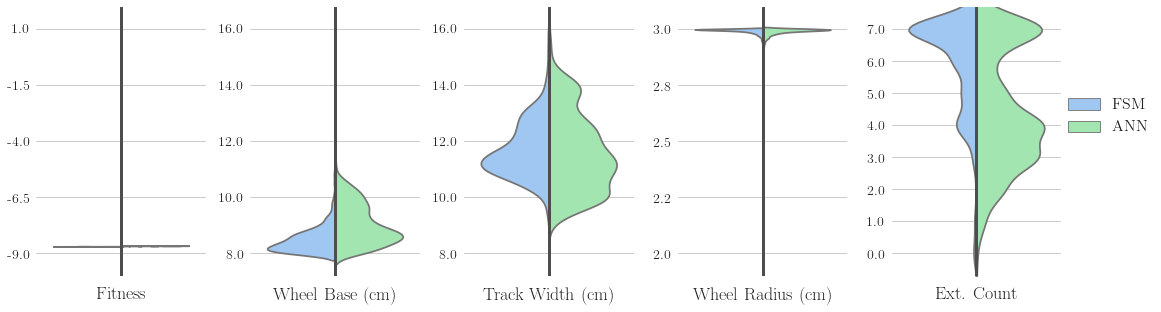

In [123]:
# Physical Characteristics

col_names = ['fitness', 'Wheel Base', 'Track Width', 'Wheel Radius', 'Weg Count']

df_fsm_phys = df_fsm_best[col_names].copy()
df_bnn_phys = df_bnn_best[col_names].copy()
df_fsm_phys['Category'] = 'FSM'
df_bnn_phys['Category'] = 'ANN'
df = pd.concat([df_fsm_phys, df_bnn_phys], keys=['FSM', 'ANN'], axis=0)
df['all'] = ''


col_offset = 5
col_count = 4
col_names = df_fsm_best.columns[col_offset:col_offset + col_count]
ncols = len(col_names) + 1
fsize = ncols * 3, 9/2
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=fsize)


for ax, col_name, map_idx in zip(axes, ['fitness'] + list(col_names), range(-1, ncols)):
    if map_idx == -1:
        ymin, ymax = -9, 1
        fancy_name = 'Fitness'
    else:
        m = fsm_map[map_idx]
        ymin, ymax = m['T'](m['minval']), m['T'](m['maxval'])
        fancy_name = m['fancy_name']
    
    # Plot the violin for this parameter
    sns.violinplot(x='all'
                   , y=col_name
                   , data=df
                   , hue='Category'
                   , ax=ax
                   , inner=None
                   , split=True
                   , scale_hue=False
                   , scale='width'
                  )

    # Set the y limits with some padding
    y_padding = (ymax - ymin) * 0.1
    ylims_with_padding = [ymin - y_padding, ymax + y_padding]
    ax.set_ylim(ylims_with_padding)
    
    # Prettify the lines and ticks
    if col_name == 'Weg Count':
        yticks = np.linspace(ymin, ymax, num=ymax + 1)
    else:
        yticks = np.linspace(ymin, ymax, num=5)
    ax.set_yticks(yticks)
    ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=14)
    ax.set_xlabel(fancy_name, fontsize=18)
    ax.set_ylabel('')
    
    ax.legend_.remove()
    ax.plot([0, 0], ylims_with_padding, color='0.3', linestyle='-', linewidth=3)
    
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
axes[-1].legend(loc=(1,0.5), fontsize=16)

# fig.savefig('morph-params.png')
# handles, labels = axes[-1].get_legend_handles_labels()
# lgd = axes[-1].legend(handles, labels, loc=(1, 0.5), fontsize=16)#, bbox_to_anchor=(0.5,-0.1))

# fig.savefig('params1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
# fig.savefig('params2.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


In [130]:
def plot_violins(df, col_names, map_offset, violin_size, exp_map):
    col_count = len(col_names)
    df_violin = df[col_names].copy()
    
    figsize = violin_size[0] * col_count, violin_size[1]

    fig, axes = plt.subplots(nrows=1, ncols=col_count, figsize=figsize)

    for ax, col_name, map_idx in zip(axes, col_names, range(map_offset, map_offset + col_count)):
        m = exp_map[map_idx]
        ymin, ymax = m['T'](m['minval']), m['T'](m['maxval'])

        # Plot the violin for this parameter
        sns.violinplot(df_violin[col_name], ax=ax, orient='v')

        # Set the y limits with some padding
        y_padding = (ymax - ymin) * 0.1
        ylims_with_padding = [ymin - y_padding, ymax + y_padding]
        ax.set_ylim(ylims_with_padding)

        # Prettify the lines and ticks
        yticks = np.linspace(ymin, ymax, num=5)
        ax.set_yticks(yticks)
        ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=14)
        ax.set_xlabel(m['fancy_name'], fontsize=18)
        ax.set_ylabel('')

    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout()
    return fig, axes

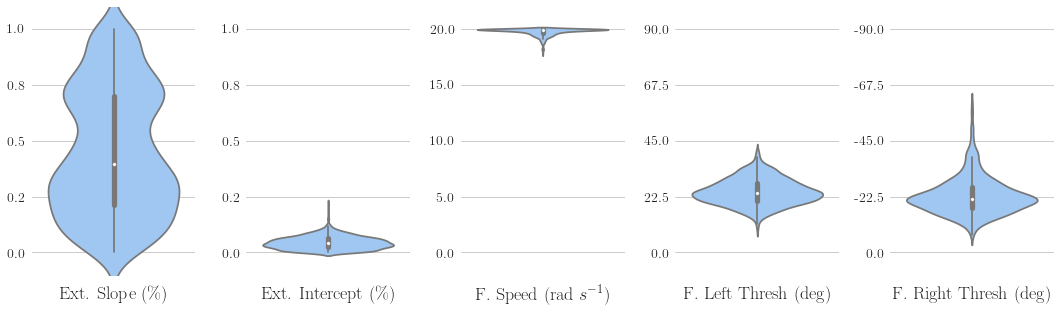

In [131]:
col_start = 9
col_count = 5
figsize = (3, 4.5)
col_names = list(df_fsm_best.columns[col_start:col_start + col_count])
fig, axes = plot_violins(df_fsm_best, col_names, col_start - 5, figsize, fsm_map)
axes[4].invert_yaxis()

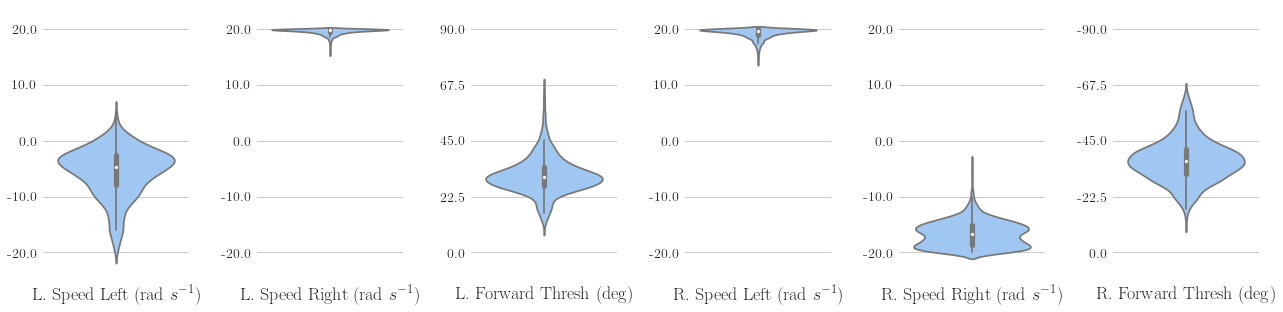

In [132]:
col_start = 14
col_count = 6
col_names = list(df_fsm_best.columns[col_start:col_start + col_count])
fig, axes = plot_violins(df_fsm_best, col_names, col_start - 5, figsize, fsm_map)
axes[5].invert_yaxis()

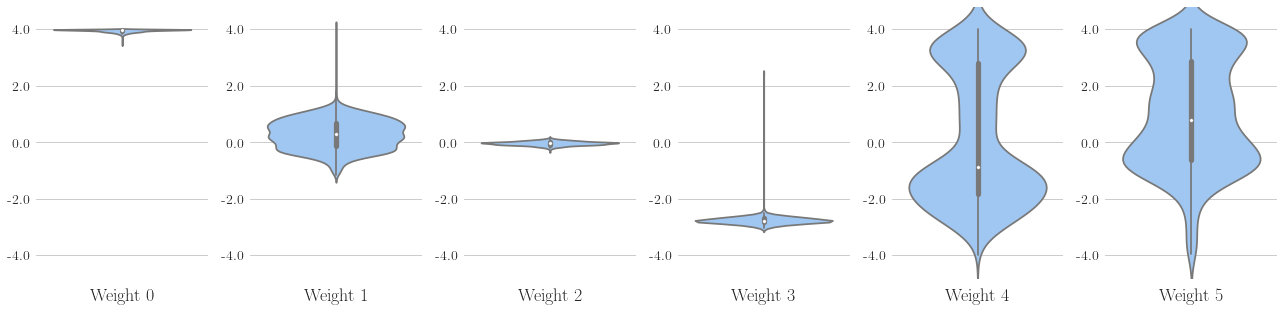

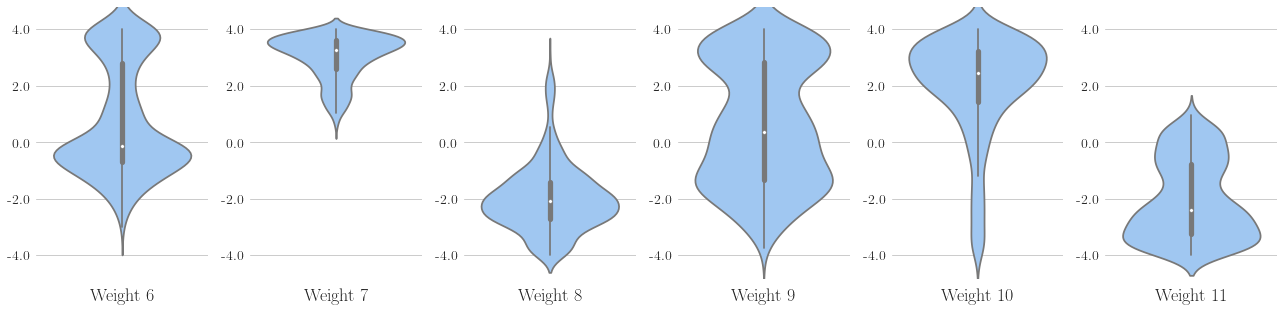

In [136]:
col_start = 10
col_count = 6
col_names = list(df_bnn_best.columns[col_start:col_start + col_count])
fig1, axes1 = plot_violins(df_bnn_best, col_names, col_start - 5, figsize, bnn_map)

col_start = 16
col_count = 6
col_names = list(df_bnn_best.columns[col_start:col_start + col_count])
fig2, axes2 = plot_violins(df_bnn_best, col_names, col_start - 5, figsize, bnn_map)